# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations:
1. Visualy the correlation between latitude and temperature is very tight. With higher temperatures centered around latitude 0 or the "Ecuator" and lower as one moves away from the "Ecuator".
2. There appears to be little relationship between latitude and cloudiness
3. Similarly there appears to be little correlation between latitude and wind speed


In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import openweathermapy as ow
from urllib.error import HTTPError
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# Create List for lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
# base URL for data call through API
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Define units to import
units = {'units':'imperial','appid':api_key}

# Data to import
target_data = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [36]:
# setting variables to capture the data
cloudiness =[]
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat = []
lng = []
cities_list = []


In [37]:
# downloading the data
print('Beginning Data Retrieval')
print('------------------------------')
counter = 1
for city in cities:
    city_url = base_url + '&q=' + city.replace(' ','+')
    print(f'Processing Record {counter} of Set 1 | {city}')
    try:
        city_data = ow.get_current(city,**units)
        cl,ct,dt,hm,mt,ws,lt,ln = city_data(*target_data)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        lng.append(ln)
        cities_list.append(city)
    except HTTPError:
        print('City not found. Skipping...')
    counter += 1
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | inuvik
Processing Record 2 of Set 1 | bhatkal
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | slave lake
Processing Record 5 of Set 1 | upata
Processing Record 6 of Set 1 | oranjestad
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tidore
City not found. Skipping...
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | pecos
Processing Record 17 of Set 1 | meulaboh
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | marsa matruh
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | tas

Processing Record 183 of Set 1 | atuona
Processing Record 184 of Set 1 | drosaton
Processing Record 185 of Set 1 | carnarvon
Processing Record 186 of Set 1 | leshukonskoye
Processing Record 187 of Set 1 | palaiokhorion
Processing Record 188 of Set 1 | penzance
Processing Record 189 of Set 1 | aswan
Processing Record 190 of Set 1 | sechura
Processing Record 191 of Set 1 | klaksvik
Processing Record 192 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 193 of Set 1 | olafsvik
City not found. Skipping...
Processing Record 194 of Set 1 | shimoda
Processing Record 195 of Set 1 | ilulissat
Processing Record 196 of Set 1 | constitucion
Processing Record 197 of Set 1 | villarrica
Processing Record 198 of Set 1 | la libertad
Processing Record 199 of Set 1 | lavrentiya
Processing Record 200 of Set 1 | mount isa
Processing Record 201 of Set 1 | ijaki
City not found. Skipping...
Processing Record 202 of Set 1 | pemba
Processing Record 203 of Set 1 | san cristobal
Processing Record 

Processing Record 360 of Set 1 | vestmannaeyjar
Processing Record 361 of Set 1 | fort walton beach
Processing Record 362 of Set 1 | lakota
Processing Record 363 of Set 1 | irpa irpa
Processing Record 364 of Set 1 | pangai
Processing Record 365 of Set 1 | tura
Processing Record 366 of Set 1 | beruni
City not found. Skipping...
Processing Record 367 of Set 1 | greensburg
Processing Record 368 of Set 1 | nago
Processing Record 369 of Set 1 | pinawa
Processing Record 370 of Set 1 | tanda
Processing Record 371 of Set 1 | chiang klang
Processing Record 372 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 373 of Set 1 | aranda de duero
Processing Record 374 of Set 1 | manadhoo
Processing Record 375 of Set 1 | aasiaat
Processing Record 376 of Set 1 | puerto maldonado
Processing Record 377 of Set 1 | hami
Processing Record 378 of Set 1 | fortuna
Processing Record 379 of Set 1 | lagunas
Processing Record 380 of Set 1 | madison
Processing Record 381 of Set 1 | taitung
Processin

Processing Record 538 of Set 1 | san miguel
Processing Record 539 of Set 1 | westpunt
City not found. Skipping...
Processing Record 540 of Set 1 | taltal
Processing Record 541 of Set 1 | morristown
Processing Record 542 of Set 1 | houma
Processing Record 543 of Set 1 | san quintin
Processing Record 544 of Set 1 | asosa
Processing Record 545 of Set 1 | korla
City not found. Skipping...
Processing Record 546 of Set 1 | athens
Processing Record 547 of Set 1 | byron bay
Processing Record 548 of Set 1 | perth
Processing Record 549 of Set 1 | manama
Processing Record 550 of Set 1 | husavik
Processing Record 551 of Set 1 | warqla
City not found. Skipping...
Processing Record 552 of Set 1 | talnakh
Processing Record 553 of Set 1 | chamrajnagar
Processing Record 554 of Set 1 | kutum
Processing Record 555 of Set 1 | isangel
Processing Record 556 of Set 1 | komsomolskiy
Processing Record 557 of Set 1 | lac du bonnet
Processing Record 558 of Set 1 | christchurch
Processing Record 559 of Set 1 | va

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
# Create city and weather Dataframe
weather_df = pd.DataFrame({'City':cities_list,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity,'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind Speed':wind_speed})


In [51]:
# count number cities in data frame by weather category
weather_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [52]:
# Weather by city preview of Data 
weather_df.head()
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [55]:
# Generating scatter plot for latitude vs temperature plot 

def plot_lat(y,y_label):
    lat_y = plt.scatter(weather_df['Lat'],weather_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(weather_df[y])-20, max(weather_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))
                             

### Latitude vs. Temperature Plot

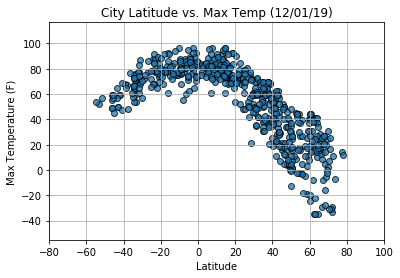

In [43]:
#  State the Y label and plot the scatter plot
lat_temp = plot_lat(y='Max Temp', y_label='Max Temperature (F)')
lat_temp

#### Latitude vs. Humidity Plot

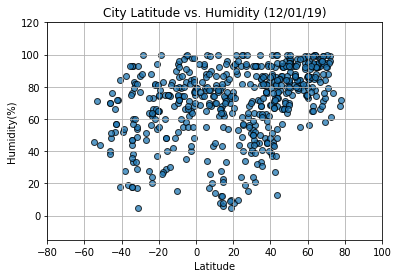

In [44]:
lat_humidity = plot_lat(y="Humidity", y_label='Humidity(%)')
lat_humidity

#### Latitude vs. Cloudiness Plot

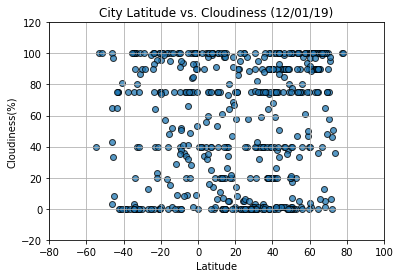

In [45]:
lat_cloud=plot_lat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

#### Latitude vs. Wind Speed Plot

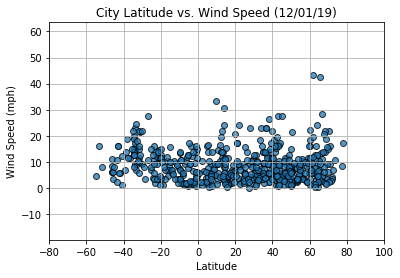

In [46]:
lat_wind=plot_lat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind